# California Housing Prices — Notebook 1
Initial notebook for exploratory data analysis of the California housing dataset.

## Objectives
- Load and inspect the raw data from `Data/housing.csv`.
- Run a quick data sanity check (shape, dtypes, missing values).
- Prepare a short plan for EDA and modeling.

In [13]:
# Environment and imports
import sys
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
%matplotlib inline

In [14]:
# Load dataset
DATA_PATH = Path('..') / 'Data' / 'housing.csv'
DATA_PATH = DATA_PATH.resolve()
df = pd.read_csv(DATA_PATH)

In [7]:
# Quick peek at the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# data shape
df.shape

(20640, 10)

In [8]:
# Info and summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [11]:
# print all column names
print(df.columns.tolist())

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


## Next steps
- Data cleaning (missing values, types, outliers).
- Exploratory visualizations (distributions, correlations, geospatial plots).
- Feature engineering and baseline model.

I'll add a `requirements.txt` and a small `README.md` next if you want a reproducible environment.

## Exploratory Data Analysis (quick checks)

This section runs quick sanity checks: missing values, duplicates, target distribution, correlations, and a small sampled scatter plot to spot relationships.

Missing values per column:
 total_bedrooms    207
dtype: int64

Duplicate rows: 0


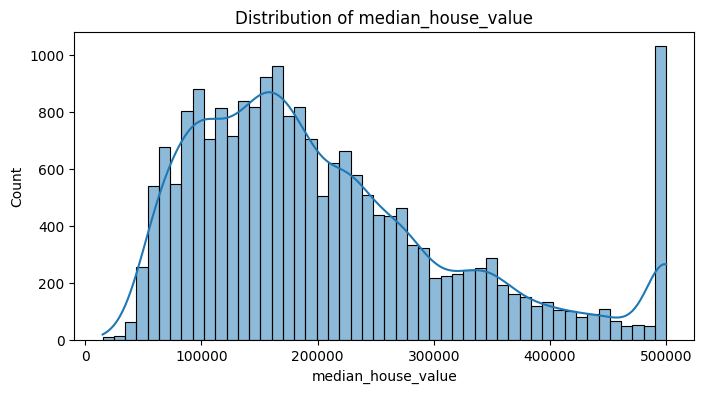


Top correlations with median_house_value:
 median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


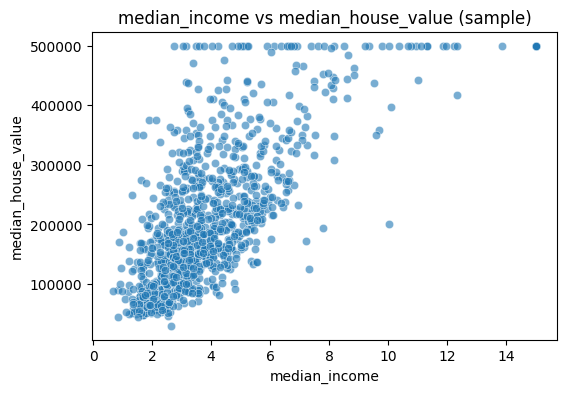

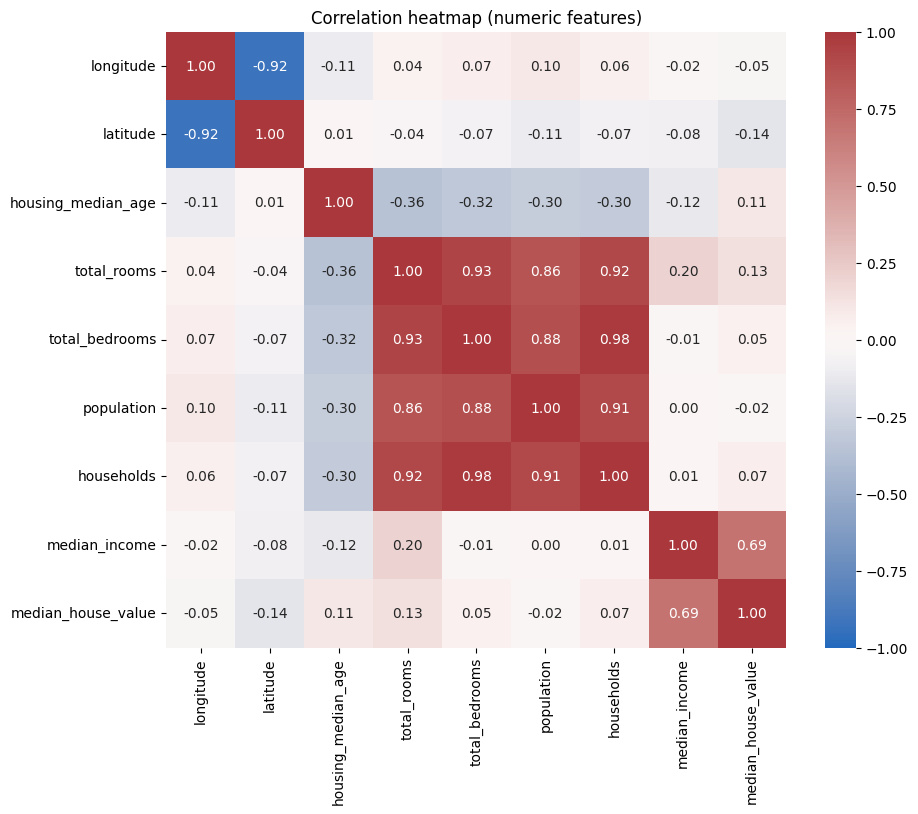

In [17]:
# Quick EDA checks

# missing values per column
missing = df.isna().sum().sort_values(ascending=False)
print('Missing values per column:\n', missing[missing > 0])

# duplicates
dups = df.duplicated().sum()
print('\nDuplicate rows:', dups)

# target distribution (median_house_value)
if 'median_house_value' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['median_house_value'], bins=50, kde=True)
    plt.title('Distribution of median_house_value')
    plt.show()
else:
    print('\nNo column named median_house_value found')

# correlations with target (use numeric-only columns to avoid conversion errors)
if 'median_house_value' in df.columns:
    num = df.select_dtypes(include=[np.number])
    if 'median_house_value' in num.columns and num.shape[1] > 1:
        corr = num.corr()['median_house_value'].sort_values(ascending=False)
        print('\nTop correlations with median_house_value:\n', corr.head(10))
    else:
        print('\nNot enough numeric columns to compute correlations or median_house_value is non-numeric')

# sample scatter: median_income vs median_house_value
if set(['median_income','median_house_value']).issubset(df.columns):
    sample = df.sample(min(1000, len(df)), random_state=42)
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='median_income', y='median_house_value', data=sample, alpha=0.6)
    plt.title('median_income vs median_house_value (sample)')
    plt.show()

# correlation heatmap for numeric cols
num = df.select_dtypes(include=[np.number])
if num.shape[1] > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='vlag', vmax=1, vmin=-1)
    plt.title('Correlation heatmap (numeric features)')
    plt.show()
else:
    print('\nNo numeric columns to show heatmap')

### EDA — Key observations and interpretation

- Distribution of `median_house_value`: The target appears right-skewed with a long tail and possible top-end cap/outliers; consider a log transform or winsorization for modeling, and check for any artificial caps in the dataset.

- Missing values & duplicates: Missing values were reported above — plan to inspect columns with missingness and impute or drop depending on cardinality and importance; duplicates (if any) should be examined and removed if they represent repeated records.

- Correlations: Numeric correlations show that `median_income` is positively correlated with `median_house_value`, suggesting income is an important predictor; many room/household features are strongly inter-correlated — this indicates derived features (rooms per household, population per household) will be more informative than raw totals.

- Scatter (median_income vs median_house_value): The scatter shows a clear positive relationship but considerable variance — income explains part of house value, but location and other factors matter.

- Non-numeric features: Categorical fields such as proximity indicators (e.g., 'NEAR BAY') are non-numeric and should be encoded before inclusion in correlation/ML steps. Also consider geospatial relationships using `longitude` and `latitude`.

Next steps
- Clean: handle missing values, remove or cap extreme outliers, and confirm no label leakage.
- Feature engineering: create per-household features (rooms/household, bedrooms/room), bucket `median_income`, and encode categorical proximity features.
- Geospatial EDA: plot prices on a map to capture location effects.
- Baseline model: build a simple regression (e.g., RandomForest or LinearRegression with log-target) to get a performance baseline.

I'll implement these steps next if you'd like; tell me whether to (a) run geospatial plots, (b) add feature-engineering cells now, or (c) build a baseline model.